In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
path  = r"/content/data_YesBank_StockPrices.csv"

df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#checking the size of the dataset
df.shape

(185, 5)

185---->Records
5------>Series

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
#converting the date column from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%b-%y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()


,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [ ]:
df.drop('Date', inplace = True, axis=1)

df.head()

,Open,High,Low,Close,Month,Year
0,13.00,14.00,11.25,12.46,7,2005
1,12.58,14.88,12.55,13.42,8,2005
2,13.48,14.87,12.27,13.30,9,2005
3,13.20,14.47,12.40,12.99,10,2005
4,13.35,13.88,12.88,13.41,11,2005


In [ ]:
df.Year.unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int32)

<Axes: xlabel='Month', ylabel='Close'>

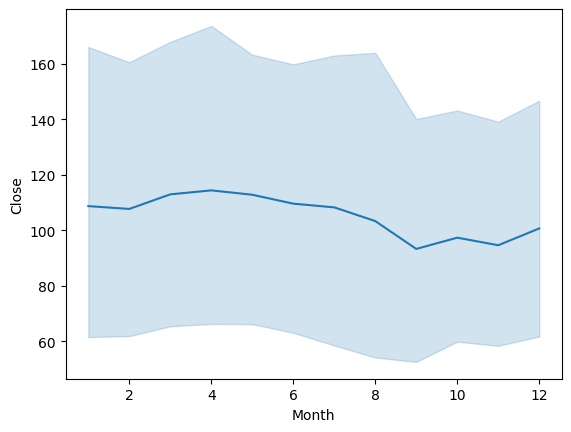

In [ ]:
sns.lineplot(x = 'Month', y = 'Close', data = df)


In [ ]:
df.corr()

,Open,High,Low,Close,Month,Year
Open,1.000000,0.993040,0.983978,0.977971,-0.034239,0.624325
High,0.993040,1.000000,0.983422,0.985051,-0.042511,0.638603
Low,0.983978,0.983422,1.000000,0.995358,-0.041818,0.599056
Close,0.977971,0.985051,0.995358,1.000000,-0.055796,0.608408
Month,-0.034239,-0.042511,-0.041818,-0.055796,1.000000,-0.063055
Year,0.624325,0.638603,0.599056,0.608408,-0.063055,1.000000


In [ ]:
#checking the duplicates
df.duplicated().sum()

np.int64(0)

#no duplicate values found

In [ ]:
#checkking the null values
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Month,0
Year,0


No null values found

In [ ]:
#descriibing the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90
Month,185.0,6.567568,3.446332,1.00,4.00,7.00,10.00,12.00
Year,185.0,2012.702703,4.471315,2005.00,2009.00,2013.00,2017.00,2020.00


#EDA

#UNIVARAITE ANALYSIS

In [ ]:
col  = list(df.columns)

col

['Open', 'High', 'Low', 'Close', 'Month', 'Year']

<Axes: title={'center': 'Box Plot'}>

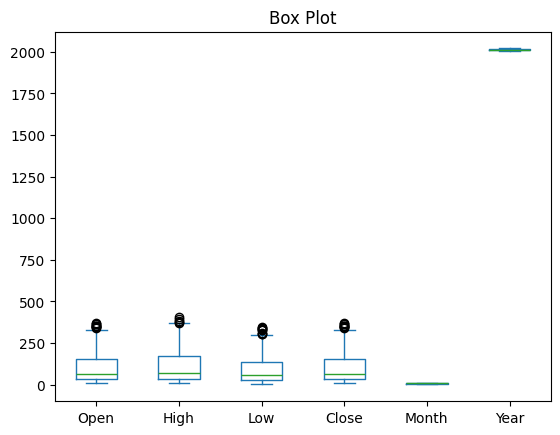

In [ ]:
  #predicting the outliers by plotting box plot
  ax = df[col].plot(kind = 'box', title = 'Box Plot')

  ax

<Axes: xlabel='Close', ylabel='Density'>

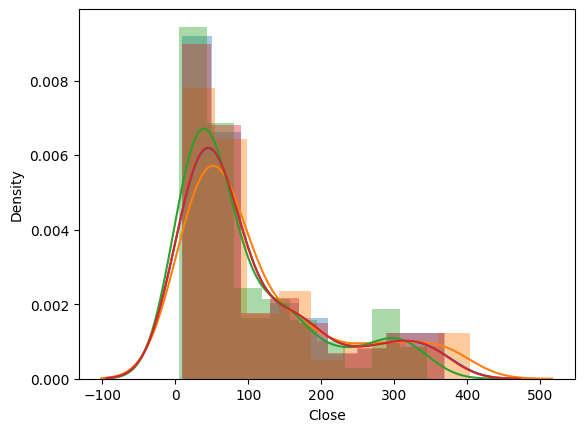

In [ ]:
#how the distribution of columns can be known
sns.distplot(df['Open'], kde = True)
sns.distplot(df['High'], kde = True)
sns.distplot(df['Low'], kde = True)
sns.distplot(df['Close'], kde = True)

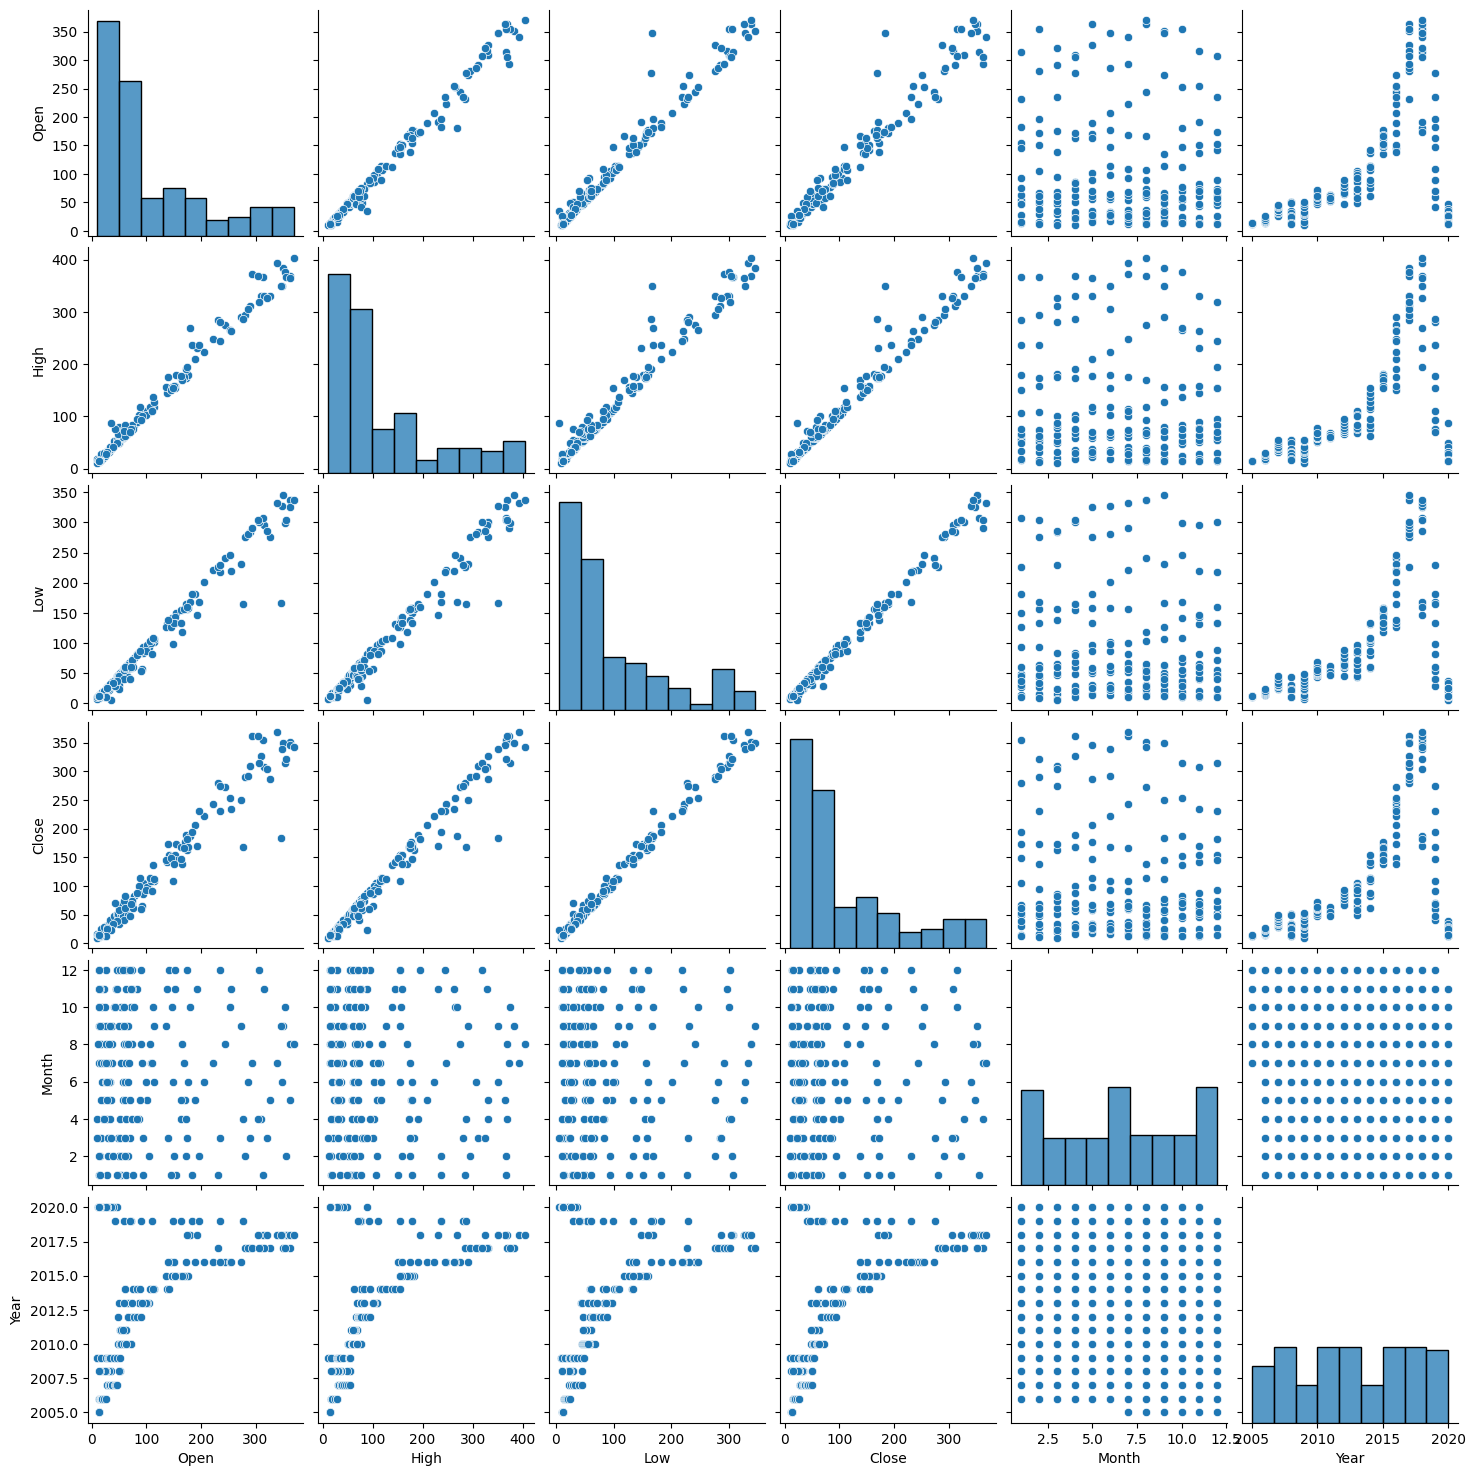

In [ ]:
#multivarate analysics
sns.pairplot(df)

<Axes: >

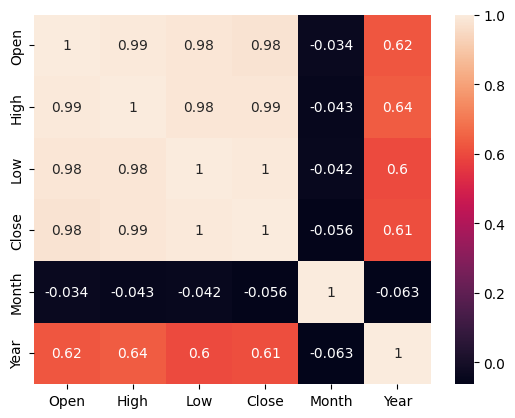

In [ ]:
#heatmap
sns.heatmap(df.corr(), annot = True)

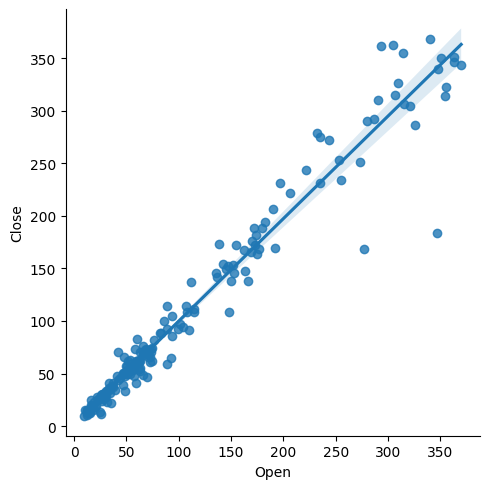

In [ ]:
sns.lmplot(x = 'Open', y = 'Close', data= df) # Changed 'open' to 'Open'

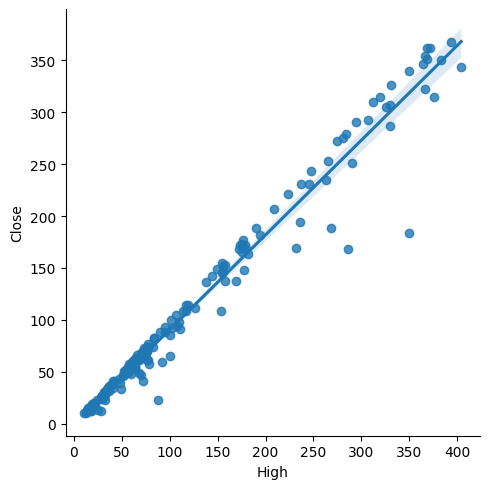

In [ ]:
sns.lmplot(x = 'High', y = 'Close', data= df)

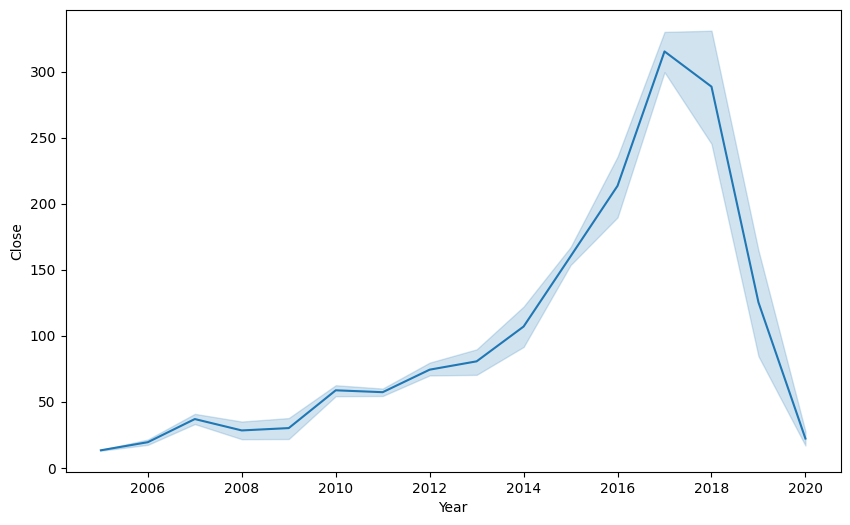

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Year', y = 'Close', data = df)
plt.xlabel("Year") # Use plt.xlabel to set the x-axis title
plt.ylabel("Close") # Use plt.ylabel to set the y-axis title
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

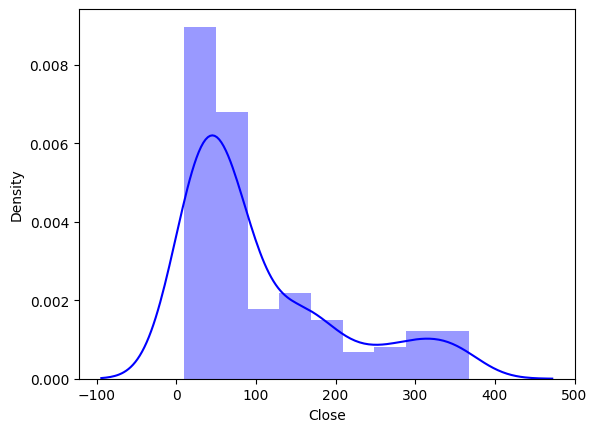

In [ ]:
sns.distplot(df['Close'], color = 'b')

<Axes: xlabel='Close', ylabel='Density'>

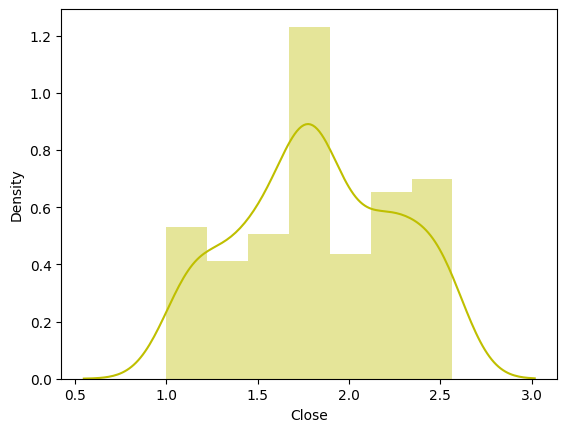

In [ ]:
sns.distplot(np.log10(df['Close']), color = 'y')

#we have used lograthimic transformation to normalise our target variable

In [ ]:
numeric_col = df[['High', 'Low', 'Open', 'Close']]

numeric_col

,High,Low,Open,Close
0,14.00,11.25,13.00,12.46
1,14.88,12.55,12.58,13.42
2,14.87,12.27,13.48,13.30
3,14.47,12.40,13.20,12.99
4,13.88,12.88,13.35,13.41
...,...,...,...,...
180,28.30,11.10,25.60,11.95
181,17.16,11.85,12.00,14.37
182,15.34,12.75,14.30,13.15
183,14.01,12.11,13.30,12.42


In [ ]:
numeric_col[:-1]

,High,Low,Open,Close
0,14.00,11.25,13.00,12.46
1,14.88,12.55,12.58,13.42
2,14.87,12.27,13.48,13.30
3,14.47,12.40,13.20,12.99
4,13.88,12.88,13.35,13.41
...,...,...,...,...
179,31.95,25.55,27.75,25.60
180,28.30,11.10,25.60,11.95
181,17.16,11.85,12.00,14.37
182,15.34,12.75,14.30,13.15


In [ ]:
corr =  numeric_col.corr()

corr

,High,Low,Open,Close
High,1.000000,0.983422,0.993040,0.985051
Low,0.983422,1.000000,0.983978,0.995358
Open,0.993040,0.983978,1.000000,0.977971
Close,0.985051,0.995358,0.977971,1.000000


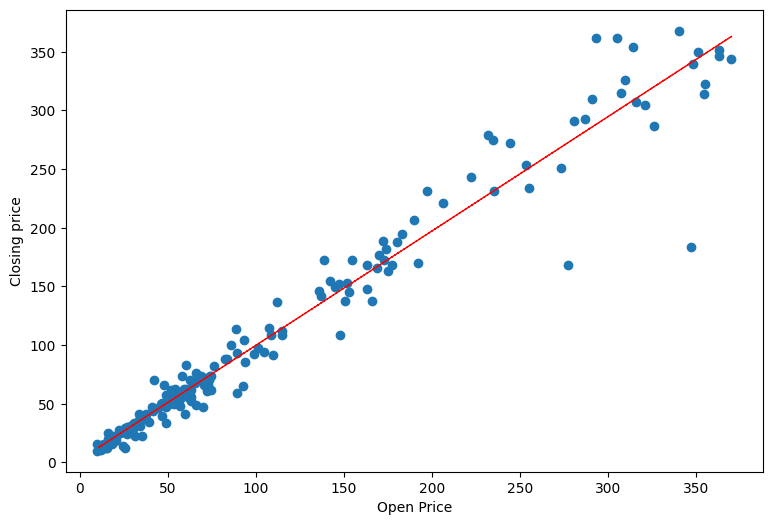

In [ ]:

fig = plt.figure(figsize=(9,6))
ax = fig.gca()

plt.scatter(x = df['Open'], y = df['Close'])
plt.ylabel('Closing price')
plt.xlabel("Open Price")
z = np.polyfit(df['Open'], df['Close'], 1)
p = np.poly1d(z)
plt.plot(df['Open'], p(df['Open']), "r--", lw = 1)

plt.show()

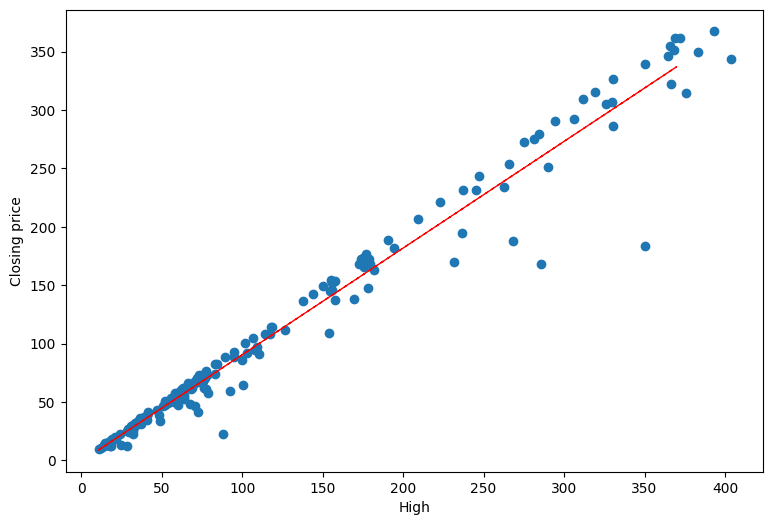

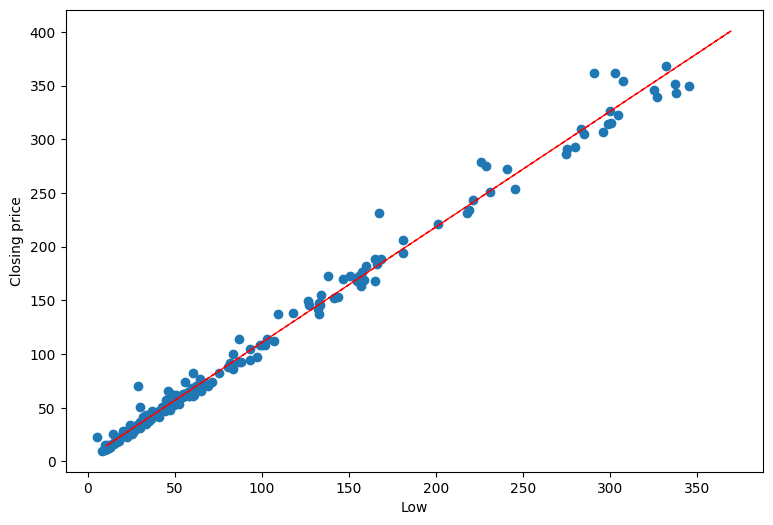

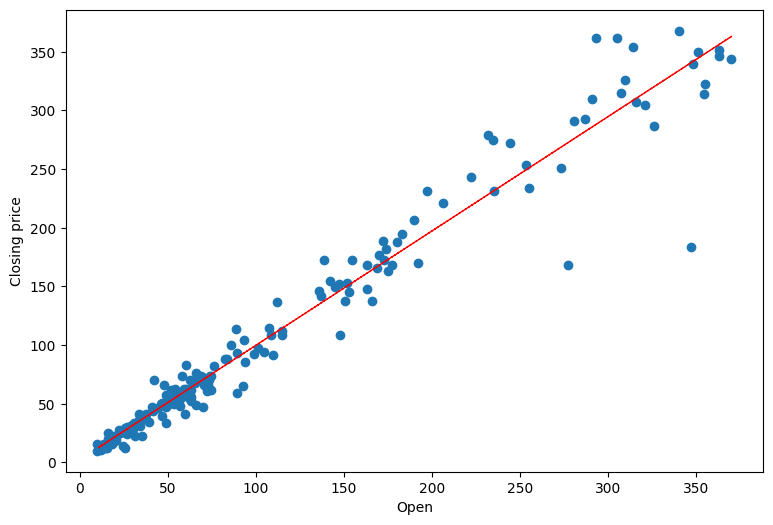

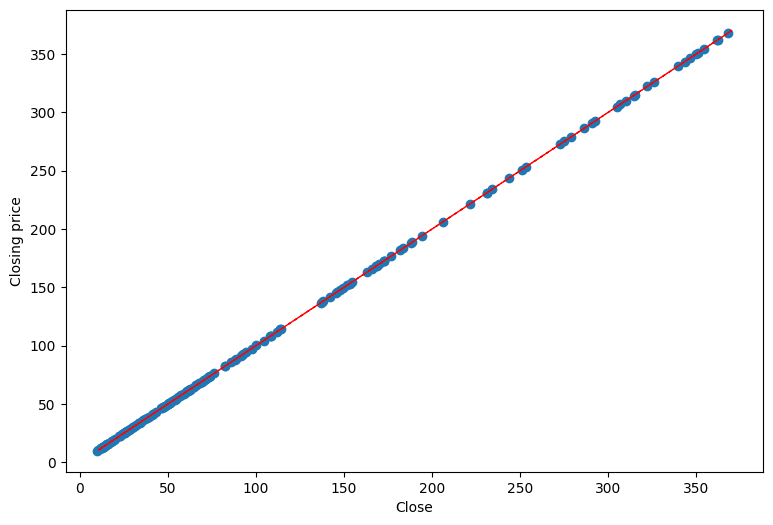

In [ ]:
for col in numeric_col[:-1]:
  features = df[col]
  label = df['Close']

  fig = plt.figure(figsize=(9,6))
  x = fig.gca()

  plt.scatter(x =features , y = label)
  plt.ylabel('Closing price')
  plt.xlabel(col)
  z = np.polyfit(features, label, 1)
  p = np.poly1d(z)
  plt.plot(df['Open'], p(df['Open']), "r--", lw = 1)

plt.show()

<Axes: >

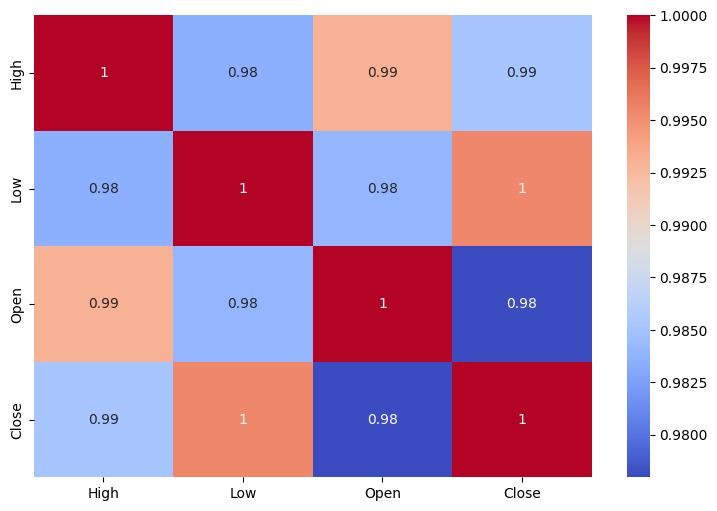

In [ ]:
plt.figure(figsize=(9,6))
corr = numeric_col.corr()
sns.heatmap(abs(corr), annot = True , cmap = 'coolwarm')

In [ ]:
df_copy = df.copy()

X = df_copy[['High', 'Low', 'Open' , 'Month','Year']]
y  = df_copy['Close']

In [ ]:
X.corr()

,High,Low,Open,Month,Year
High,1.000000,0.983422,0.993040,-0.042511,0.638603
Low,0.983422,1.000000,0.983978,-0.041818,0.599056
Open,0.993040,0.983978,1.000000,-0.034239,0.624325
Month,-0.042511,-0.041818,-0.034239,1.000000,-0.063055
Year,0.638603,0.599056,0.624325,-0.063055,1.000000


In [ ]:
df.head()

,Open,High,Low,Close,Month,Year
0,13.00,14.00,11.25,12.46,7,2005
1,12.58,14.88,12.55,13.42,8,2005
2,13.48,14.87,12.27,13.30,9,2005
3,13.20,14.47,12.40,12.99,10,2005
4,13.35,13.88,12.88,13.41,11,2005


In [ ]:
X = df_copy[['High', 'Low', 'Open' , 'Month','Year']]
y  = df_copy['Close'] #target variable

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size= 0.8)

In [ ]:
#Create scalar object
scaler = StandardScaler()

scaler

StandardScaler()

In [ ]:
#Fit the scaler object on X_train
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

#Model 1 : LinearREgression

In [ ]:
#Linear regression
regressor = LinearRegression()

regressor

LinearRegression()

In [ ]:
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(x_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, precision_score

In [ ]:
def performance(y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  print("R-squared:", r2)
  print("Mean Squared Error:", mse)
  print("Root Mean Squared Error:", rmse)

In [ ]:
performance(y_test, y_pred)

R-squared: 0.99617708490829
Mean Squared Error: 36.077138219588164
Root Mean Squared Error: 6.006424745186455


In [ ]:
def visualisation(y_test, y_pred):
  index = range(len(y_test))

  plt.scatter(index, y = y_test, color = 'green', label = "test")
  plt.scatter(index, y = y_pred, color = 'black', label = 'y_pred' )
  plt.legend()
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Actual Vs Predicted')



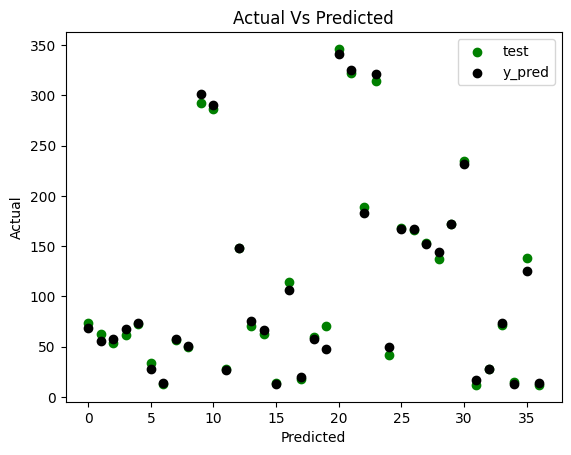

In [ ]:
visualisation(y_test, y_pred)

#Model 2 : Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso

Lasso()

In [ ]:
lasso.fit(X_train_scaled, y_train)


Lasso()

In [ ]:
y_pred = lasso.predict(x_test_scaled)

In [ ]:
performance(y_test, y_pred)

R-squared: 0.9930852175795317
Mean Squared Error: 65.25532353114102
Root Mean Squared Error: 8.078076722286129


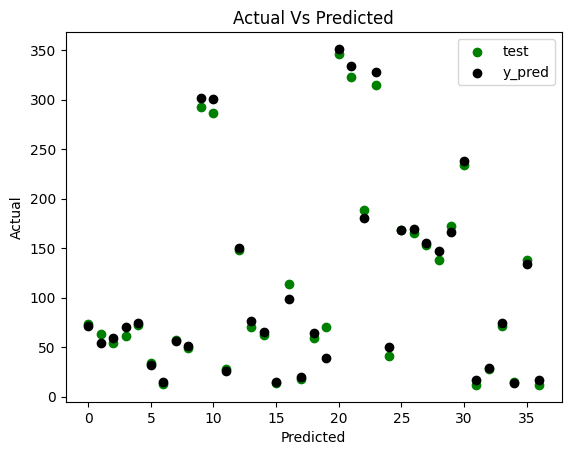

In [ ]:
visualisation(y_test, y_pred)

#model 3 : RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth =2, random_state = 0)
regr

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
y_pred = regr.predict(x_test_scaled)

In [ ]:
performance(y_test, y_pred)

R-squared: 0.9725764038633966
Mean Squared Error: 258.7985462831408
Root Mean Squared Error: 16.087216859455236


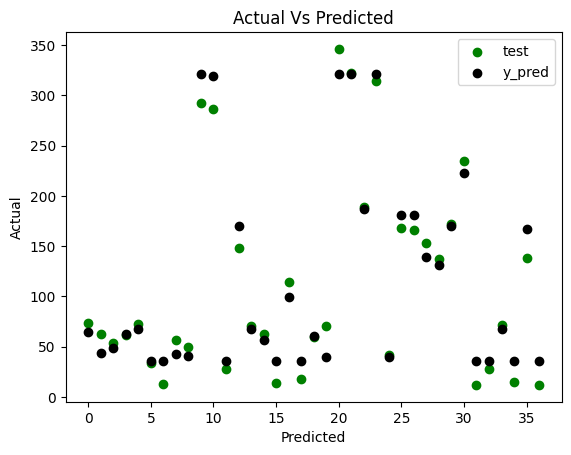

In [ ]:
visualisation(y_test, y_pred)

#Model 4 : XG-BOOSt regressor

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgreg = XGBRegressor(**params)

xgreg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01,
             loss='squared_error', max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, min_samples_split=5,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=500, n_jobs=None, ...)

In [ ]:
xgreg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01,
             loss='squared_error', max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, min_samples_split=5,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=500, n_jobs=None, ...)

In [ ]:
y_pred = xgreg.predict(x_test_scaled)

In [ ]:
performance(y_test, y_pred)

R-squared: 0.9872380154446221
Mean Squared Error: 120.4358113417275
Root Mean Squared Error: 10.974325097322728


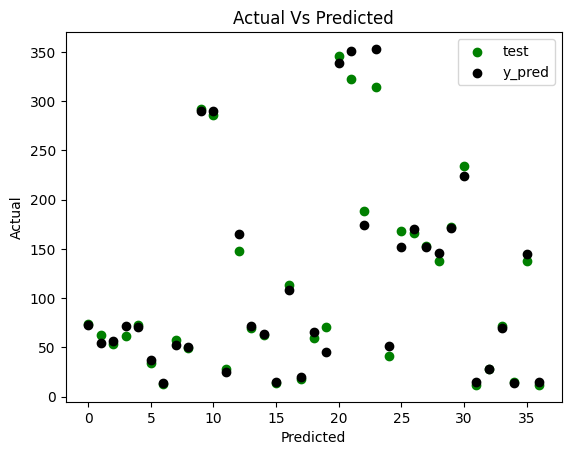

In [ ]:
visualisation(y_test, y_pred)

Best model which gives less mean squared error is Regression model